In [33]:
%matplotlib inline
from pandas_datareader import data
import pandas as pd
tickers = ["F", "TM", "GM", "TSLA"]
first_date = '2012-01-01'
last_date = '2016-12-31'


In [31]:
#stock_panel = data.DataReader('GM', 'yahoo', first_date,last_date)
#INPX = data.DataReader('GM', 'yahoo', first_date, last_date)
import pandas as pd
import yfinance as yf

In [34]:
hist = yf.download("F TM GM TSLA", start=first_date, end=last_date,interval='1d')
#hist= instr.history(period="2y")
hist.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                               Close             \
                   F         GM         TM   TSLA      F         GM   
Date                                                                  
2012-01-03  7.506940  16.269409  59.586102  5.616  11.13  21.049999   
2012-01-04  7.621600  16.346703  60.157536  5.542  11.30  21.150000   
2012-01-05  7.817202  17.135057  60.324562  5.424  11.59  22.170000   
2012-01-06  7.898136  17.714725  60.227859  5.382  11.71  22.920000   
2012-01-09  7.958840  17.652895  60.148735  5.450  11.80  22.840000   

                               High             ...        Low          Open  \
                   TM   TSLA      F         GM  ...         TM   TSLA      F   
Date                                            ...                            
2012-01-03  67.779999  5.616  11.25  21.180000  ...  67.309998  5.530  11.00   
2012-01-04  68.430000  5.542  11.53  21.370001  ...  68.070000  5.500  11.15   
2012-01-05  68.620003  5.424  11.63  22.290001  ...  68.370003  5.370  11.33   
2012-01-06  68.510002  5.382  11.80  23.030001  ...  68.220001  5.282  11.74   
2012-01-09  68.419998  5.450  11.95  23.430000  ...  68.220001  5.224  11.83   

                                           Volume                             
                   GM         TM   TSLA         F        GM      TM     TSLA  
Date                                                                          
2012-01-03  20.830000  67.389999  5.788  45709900   9321300  377100  4640500  
2012-01-04  21.049999  68.230003  5.642  79725200   7856700  501600  3150500  
2012-01-05  21.100000  68.500000  5.552  67877500  17880600  343700  5027500  
2012-01-06  22.260000  68.519997  5.440  59840700  18234500  212000  4931500  
2012-01-09  23.200001  68.500000  5.400  53981500  12084500  301700  4485000  

[5 rows x 24 columns]

<AxesSubplot:xlabel='Date'>

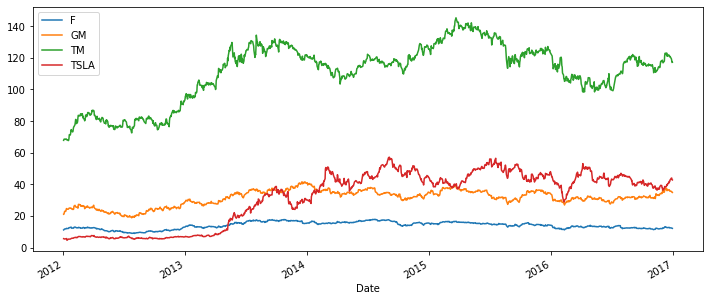

In [55]:
stock_df = hist.Close.dropna()
stock_df.plot(figsize=(12,5))

In [74]:
 #this dataframe indicates if the stock was higher in 180 days
classes = (stock_df.shift(-180) > stock_df).astype(int)

In [57]:
classes

,F,GM,TM,TSLA
Date,,,,
2012-01-03,0,1,1,1
2012-01-04,0,1,1,1
2012-01-05,0,1,1,1
2012-01-06,0,1,1,1
2012-01-09,0,1,1,1
...,...,...,...,...
2016-12-23,0,0,0,0
2016-12-27,0,0,0,0
2016-12-28,0,0,0,0


In [75]:

classes = classes.unstack()
classes = classes.swaplevel(0, 1).sort_index()
classes = classes.to_frame()
classes.index.names = ['Date', 'minor']


In [76]:
classes

0
Date       minor   
2012-01-03 F      0
           GM     1
           TM     1
           TSLA   1
2012-01-04 F      0
...              ..
2016-12-29 TSLA   0
2016-12-30 F      0
           GM     0
           TM     0
           TSLA   0

[5032 rows x 1 columns]

In [111]:
X=hist
X=X.unstack()
X
#X=X.swaplevel(0,1).sort_index()
# X=X.to_frame()
# X.index.names = ['minor','item','Date']

                 Date      
Adj Close  F     2012-01-03    7.506940e+00
                 2012-01-04    7.621600e+00
                 2012-01-05    7.817202e+00
                 2012-01-06    7.898136e+00
                 2012-01-09    7.958840e+00
                                   ...     
Volume     TSLA  2016-12-23    2.335250e+07
                 2016-12-27    2.957850e+07
                 2016-12-28    1.891250e+07
                 2016-12-29    2.022500e+07
                 2016-12-30    2.321300e+07
Length: 30192, dtype: float64

In [112]:
X=X.swaplevel(0,2).sort_index()
X

Date                       
2012-01-03  F     Adj Close    7.506940e+00
                  Close        1.113000e+01
                  High         1.125000e+01
                  Low          1.099000e+01
                  Open         1.100000e+01
                                   ...     
2016-12-30  TSLA  Close        4.273800e+01
                  High         4.350000e+01
                  Low          4.233600e+01
                  Open         4.326000e+01
                  Volume       2.321300e+07
Length: 30192, dtype: float64

In [113]:
X=X.unstack(level=-1)
X

Adj Close       Close        High         Low        Open  \
Date                                                                          
2012-01-03 F       7.506940   11.130000   11.250000   10.990000   11.000000   
           GM     16.269409   21.049999   21.180000   20.750000   20.830000   
           TM     59.586102   67.779999   67.900002   67.309998   67.389999   
           TSLA    5.616000    5.616000    5.900000    5.530000    5.788000   
2012-01-04 F       7.621600   11.300000   11.530000   11.070000   11.150000   
...                     ...         ...         ...         ...         ...   
2016-12-29 TSLA   42.936001   42.936001   43.840000   42.824001   43.712002   
2016-12-30 F       9.831766   12.130000   12.280000   12.080000   12.240000   
           GM     30.474230   34.840000   35.310001   34.669998   35.209999   
           TM    117.199997  117.199997  117.910004  116.820000  117.769997   
           TSLA   42.737999   42.737999   43.500000   42.335999   43.259998   

                     Volume  
Date                         
2012-01-03 F     45709900.0  
           GM     9321300.0  
           TM      377100.0  
           TSLA   4640500.0  
2012-01-04 F     79725200.0  
...                     ...  
2016-12-29 TSLA  20225000.0  
2016-12-30 F     27405700.0  
           GM     7646100.0  
           TM      153400.0  
           TSLA  23213000.0  

[5032 rows x 6 columns]

In [118]:
X.index.names = ['Date','minor']
X

Adj Close       Close        High         Low        Open  \
Date       minor                                                               
2012-01-03 F        7.506940   11.130000   11.250000   10.990000   11.000000   
           GM      16.269409   21.049999   21.180000   20.750000   20.830000   
           TM      59.586102   67.779999   67.900002   67.309998   67.389999   
           TSLA     5.616000    5.616000    5.900000    5.530000    5.788000   
2012-01-04 F        7.621600   11.300000   11.530000   11.070000   11.150000   
...                      ...         ...         ...         ...         ...   
2016-12-29 TSLA    42.936001   42.936001   43.840000   42.824001   43.712002   
2016-12-30 F        9.831766   12.130000   12.280000   12.080000   12.240000   
           GM      30.474230   34.840000   35.310001   34.669998   35.209999   
           TM     117.199997  117.199997  117.910004  116.820000  117.769997   
           TSLA    42.737999   42.737999   43.500000   42.335999   43.259998   

                      Volume  
Date       minor              
2012-01-03 F      45709900.0  
           GM      9321300.0  
           TM       377100.0  
           TSLA    4640500.0  
2012-01-04 F      79725200.0  
...                      ...  
2016-12-29 TSLA   20225000.0  
2016-12-30 F      27405700.0  
           GM      7646100.0  
           TM       153400.0  
           TSLA   23213000.0  

[5032 rows x 6 columns]

In [120]:
data = X.join(classes).dropna()
data.rename(columns={0: 'is_higher'}, inplace=True)
data.head()

Adj Close      Close       High        Low       Open  \
Date       minor                                                          
2012-01-03 F       7.506940  11.130000  11.250000  10.990000  11.000000   
           GM     16.269409  21.049999  21.180000  20.750000  20.830000   
           TM     59.586102  67.779999  67.900002  67.309998  67.389999   
           TSLA    5.616000   5.616000   5.900000   5.530000   5.788000   
2012-01-04 F       7.621600  11.300000  11.530000  11.070000  11.150000   

                      Volume  is_higher  
Date       minor                         
2012-01-03 F      45709900.0          0  
           GM      9321300.0          1  
           TM       377100.0          1  
           TSLA    4640500.0          1  
2012-01-04 F      79725200.0          0

In [122]:
import patsy
X = patsy.dmatrix("Open + High + Low + Close + Volume + is_higher -1", data.reset_index(),return_type='dataframe')
X.head()

,Open,High,Low,Close,Volume,is_higher
0,11.000000,11.250000,10.990000,11.130000,45709900.0,0.0
1,20.830000,21.180000,20.750000,21.049999,9321300.0,1.0
2,67.389999,67.900002,67.309998,67.779999,377100.0,1.0
3,5.788000,5.900000,5.530000,5.616000,4640500.0,1.0
4,11.150000,11.530000,11.070000,11.300000,79725200.0,0.0


In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X.iloc[:, :-1], X.iloc[:, -1]);

In [126]:
from sklearn.metrics import classification_report
print (classification_report(X.iloc[:, -1].values,lda.predict(X.iloc[:, :-1])))


              precision    recall  f1-score   support

         0.0       0.59      0.78      0.67      2715
         1.0       0.59      0.36      0.45      2317

    accuracy                           0.59      5032
   macro avg       0.59      0.57      0.56      5032
weighted avg       0.59      0.59      0.57      5032



### 10-2 Working with QDA – a nonlinear LDA

In [128]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X.iloc[:, :-1], X.iloc[:, -1])
predictions = qda.predict(X.iloc[:, :-1])
predictions.sum()

1732.0

In [129]:
from sklearn.metrics import classification_report
print (classification_report(X.iloc[:, -1].values, predictions))

              precision    recall  f1-score   support

         0.0       0.62      0.75      0.68      2715
         1.0       0.61      0.45      0.52      2317

    accuracy                           0.61      5032
   macro avg       0.61      0.60      0.60      5032
weighted avg       0.61      0.61      0.60      5032



In [130]:
from sklearn.model_selection import ShuffleSplit
import scipy.stats as sp
shuffle_split_inst = ShuffleSplit()
for test, train in shuffle_split_inst.split(X):
     train_set = X.iloc[train]
     train_close = train_set.Close
     train_0 = train_close[~train_set.is_higher.astype(bool)]
     train_1 = train_close[train_set.is_higher.astype(bool)]
     test_set = X.iloc[test]
     test_close = test_set.Close.values
ll_0 = sp.norm.pdf(test_close, train_0.mean())
ll_1 = sp.norm.pdf(test_close, train_1.mean())


In [131]:
(ll_0 > ll_1).mean()

0.08657243816254417